<a href="https://colab.research.google.com/github/anwoo99/Data_Analysis/blob/master/Trumpnomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**데이터 수집**
1. 미국 3대지수 - Dow / S&P500 / NASDAQ
2. 국내 지수 - 코스피200 / 코스닥150
3. 미국 섹터별 대표 5개 기업(AI, 반도체, 2차전지, 자동차, 방산, 건설, 의료)
4. 국내 섹터별 대표 5개 기업(AI, 반도체, 2차전지, 자동차, 방산, 건설, 의료)

In [ ]:
# 미국 지수
us_indices = {
    "Dow": "^DJI",         # 다우존스
    "S&P500": "^GSPC",     # S&P 500
    "NASDAQ": "^IXIC",     # 나스닥
}

# 한국 지수
kr_indices = {
    "KOSPI200": "^KS200",   # 코스피200
    "KOSDAQ150": "^KQ11"    # 코스닥
}

# 미국 섹터별 대표 5개 기업
us_sector_stocks = {
    "AI": ["NVDA", "GOOG", "MSFT", "AMZN", "IBM"], # AI 관련 미국 기업
    "Semiconductors": ["INTC", "AMD", "NVDA", "QCOM", "TXN"], # 반도체 관련 미국 기업
    "2ndbattery": ["TSLA", "ALB", "LTHM", "FMC", "SQM"], # 2차전지 관련 미국 기업
    "Automotive": ["TSLA", "GM", "F", "TM", "HMC"], # 자동차 관련 미국 기업
    "Defense": ["LMT", "RTX", "BA", "GD", "NOC"], # 방산 관련 미국 기업
    "Construction": ["CAT", "DE", "LEN", "DHI", "PHM"], # 건설 관련 미국 기업
    "Healthcare": ["JNJ", "PFE", "MRK", "UNH", "ABBV"] # 의료 관련 미국 기업
}

# 한국 섹터별 대표 5개 기업
kr_sector_stocks = {
    "AI": ["035720.KS", "035420.KS", "003550.KS", "272450.KS", "068270.KS"], # AI 관련 한국 기업 (네이버, 카카오, LG, NAVER, 셀바스AI)
    "Semiconductors": ["005930.KS", "000660.KS", "034730.KS", "005380.KS", "006400.KS"], # 반도체 관련 한국 기업 (삼성전자, SK하이닉스, SK하이닉스, 현대차, 삼성SDI)
    "2ndbattery": ["051910.KS", "006400.KS", "373220.KS", "247540.KS", "096770.KS"], # 2차전지 관련 한국 기업 (LG화학, 삼성SDI, LG에너지솔루션, SK이노베이션, POSCO홀딩스)
    "Automotive": ["005380.KS", "005380.KS", "005380.KS", "005380.KS", "005380.KS"], # 자동차 관련 한국 기업 (현대차, 기아, 현대모비스, 현대위아, 한국타이어앤테크놀로지)
    "Defense": ["004990.KS", "000120.KS", "047050.KS", "052690.KS", "006360.KS"], # 방산 관련 한국 기업 (한국항공우주, 한화에어로스페이스, LIG넥스원, 현대로템, 풍산)
    "Construction": ["000720.KS", "006360.KS", "012630.KS", "047040.KS", "000810.KS"], # 건설 관련 한국 기업 (현대건설, GS건설, 대림산업, HDC현대산업개발, 삼성물산)
    "Healthcare": ["005930.KS", "068270.KS", "035720.KS", "000660.KS", "034730.KS"] # 의료 관련 한국 기업 (셀트리온, 삼성바이오로직스, 유한양행, 녹십자, 한미
}

In [ ]:
def yf_fetch(targets, start_date, end_date) -> dict:
    """
    주어진 티커 목록에 대해 Yahoo Finance에서 주식 및 지수 데이터를 다운로드하는 함수.

    Parameters:
    - targets (dict): 카테고리별 티커 목록을 포함하는 딕셔너리
    - start_date (str): 데이터 조회 시작 날짜 (형식: 'YYYY-MM-DD')
    - end_date (str): 데이터 조회 종료 날짜 (형식: 'YYYY-MM-DD')

    Returns:
    - result (dict): 카테고리별로 다운로드된 주식 및 지수 데이터프레임을 포함하는 딕셔너리
    """
    result = {}

    for category, tickers in targets.items():
        result[category] = {}  # 초기화

        if isinstance(tickers, list):  # 섹터별 주식(리스트 형태)
            for ticker in tickers:
                try:
                    data = yf.download(ticker, start=start_date, end=end_date)
                    if data.empty:
                        print(f"Warning: No data for {category} {ticker}")
                    else:
                        data.columns = data.columns.droplevel(1) # 멀티 인덱스 삭제
                        result[category][ticker] = data
                        print(f"Success to fetch {category} {ticker}")
                except Exception as e:
                    print(f"Error fetching {category} {ticker}: {e}")
        else:  # 지수 데이터(단일 티커)
            try:
                data = yf.download(tickers, start=start_date, end=end_date)
                if data.empty:
                    print(f"Warning: No data for {category} {tickers}")
                else:
                    data.columns = data.columns.droplevel(1) # 멀티 인덱스 삭제
                    result[category] = data
            except Exception as e:
                print(f"Error fetching {category} {tickers}: {e}")

    return result

In [ ]:
# 트럼프 2.0 당선일(11.6) 기준 범위 산정
start_date = "2024-11-01"
end_date = "2024-11-21"

In [ ]:
# 데이터 다운로드 using yf_fetch
yf_us_indices = yf_fetch(us_indices, start_date, end_date)
yf_kr_indices = yf_fetch(kr_indices, start_date, end_date)
yf_us_sector_stocks = yf_fetch(us_sector_stocks, start_date, end_date)
yf_kr_sector_stocks = yf_fetch(kr_sector_stocks, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch AI NVDA
Success to fetch AI GOOG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch AI MSFT
Success to fetch AI AMZN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch AI IBM
Success to fetch Semiconductors INTC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Success to fetch Semiconductors AMD
Success to fetch Semiconductors NVDA



[*********************100%***********************]  1 of 1 completed


Success to fetch Semiconductors QCOM


[*********************100%***********************]  1 of 1 completed


Success to fetch Semiconductors TXN
Success to fetch 2ndbattery TSLA


[*********************100%***********************]  1 of 1 completed


Success to fetch 2ndbattery ALB


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Success to fetch 2ndbattery FMC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch 2ndbattery SQM
Success to fetch Automotive TSLA
Success to fetch Automotive GM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Automotive F
Success to fetch Automotive TM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Automotive HMC
Success to fetch Defense LMT


[*********************100%***********************]  1 of 1 completed


Success to fetch Defense RTX


[*********************100%***********************]  1 of 1 completed


Success to fetch Defense BA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Defense GD
Success to fetch Defense NOC

[*********************100%***********************]  1 of 1 completed



Success to fetch Construction CAT


[*********************100%***********************]  1 of 1 completed


Success to fetch Construction DE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Construction LEN


[*********************100%***********************]  1 of 1 completed


Success to fetch Construction DHI
Success to fetch Construction PHM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Success to fetch Healthcare JNJ



[*********************100%***********************]  1 of 1 completed


Success to fetch Healthcare PFE
Success to fetch Healthcare MRK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Healthcare UNH
Success to fetch Healthcare ABBV


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch AI 035720.KS
Success to fetch AI 035420.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch AI 003550.KS
Success to fetch AI 272450.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch AI 068270.KS
Success to fetch Semiconductors 005930.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Semiconductors 000660.KS
Success to fetch Semiconductors 034730.KS

[*********************100%***********************]  1 of 1 completed



Success to fetch Semiconductors 005380.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Semiconductors 006400.KS
Success to fetch 2ndbattery 051910.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch 2ndbattery 006400.KS


[*********************100%***********************]  1 of 1 completed


Success to fetch 2ndbattery 373220.KS
Success to fetch 2ndbattery 247540.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch 2ndbattery 096770.KS
Success to fetch Automotive 005380.KS
Success to fetch Automotive 005380.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Automotive 005380.KS
Success to fetch Automotive 005380.KS
Success to fetch Automotive 005380.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Defense 004990.KS
Success to fetch Defense 000120.KS
Success to fetch Defense 047050.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Defense 052690.KS
Success to fetch Defense 006360.KS
Success to fetch Construction 000720.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Success to fetch Construction 006360.KS
Success to fetch Construction 012630.KS
Success to fetch Construction 047040.KS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Success to fetch Construction 000810.KS
Success to fetch Healthcare 005930.KS
Success to fetch Healthcare 068270.KS
Success to fetch Healthcare 035720.KS
Success to fetch Healthcare 000660.KS
Success to fetch Healthcare 034730.KS


In [ ]:
# 미국 지수 테이블 출력
yf_us_indices['S&P500']

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-11-01 00:00:00+00:00,5728.799805,5728.799805,5772.520020,5723.220215,5723.220215,3796450000
2024-11-04 00:00:00+00:00,5712.689941,5712.689941,5741.430176,5696.509766,5725.149902,3602060000
2024-11-05 00:00:00+00:00,5782.759766,5782.759766,5783.439941,5722.100098,5722.430176,3768310000
2024-11-06 00:00:00+00:00,5929.040039,5929.040039,5936.140137,5864.890137,5864.890137,6329530000
2024-11-07 00:00:00+00:00,5973.100098,5973.100098,5983.839844,5947.209961,5947.209961,4925740000
2024-11-08 00:00:00+00:00,5995.540039,5995.540039,6012.450195,5976.759766,5976.759766,4666740000
2024-11-11 00:00:00+00:00,6001.350098,6001.350098,6017.310059,5986.689941,6008.859863,4333000000
2024-11-12 00:00:00+00:00,5983.990234,5983.990234,6009.919922,5960.080078,6003.600098,4243400000
2024-11-13 00:00:00+00:00,5985.379883,5985.379883,6008.189941,5965.910156,5985.750000,4220180000


In [ ]:
# 한국 지수 테이블 출력
yf_kr_indices['KOSPI200']

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-11-01 00:00:00+00:00,337.489990,337.489990,339.929993,336.579987,337.559998,104600
2024-11-04 00:00:00+00:00,343.600006,343.600006,343.600006,337.799988,338.420013,99300
2024-11-05 00:00:00+00:00,341.470001,341.470001,342.880005,339.779999,340.720001,88200
2024-11-06 00:00:00+00:00,340.609985,340.609985,343.809998,337.609985,343.519989,132100
2024-11-07 00:00:00+00:00,340.869995,340.869995,343.019989,337.760010,339.690002,167225000
2024-11-08 00:00:00+00:00,339.709991,339.709991,344.559998,338.820007,343.779999,139500
2024-11-11 00:00:00+00:00,334.640015,334.640015,338.619995,333.760010,338.619995,169000
2024-11-12 00:00:00+00:00,327.309998,327.309998,334.299988,327.070007,333.670013,173500
2024-11-13 00:00:00+00:00,318.839996,318.839996,327.200012,318.579987,325.380005,171300


In [ ]:
# 미국 섹터 주식 테이블 출력
yf_us_sector_stocks['AI']['AMZN']

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-11-01 00:00:00+00:00,197.929993,197.929993,200.500000,197.020004,199.000000,99687800
2024-11-04 00:00:00+00:00,195.779999,195.779999,197.330002,194.309998,196.449997,38492100
2024-11-05 00:00:00+00:00,199.500000,199.500000,199.820007,195.990005,196.039993,30564800
2024-11-06 00:00:00+00:00,207.089996,207.089996,207.550003,199.139999,200.009995,72292200
2024-11-07 00:00:00+00:00,210.050003,210.050003,212.250000,207.190002,207.440002,52878400
2024-11-08 00:00:00+00:00,208.179993,208.179993,209.960007,207.440002,209.720001,36075800
2024-11-11 00:00:00+00:00,206.839996,206.839996,209.649994,205.589996,208.500000,35456000
2024-11-12 00:00:00+00:00,208.910004,208.910004,209.539993,206.009995,208.369995,38942900
2024-11-13 00:00:00+00:00,214.100006,214.100006,215.089996,209.139999,209.399994,46212900


In [ ]:
# 한국 섹터 주식 테이블 출력
yf_kr_sector_stocks['AI']['035720.KS']

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-11-01 00:00:00+00:00,36150.0,36150.0,36800.0,36150.0,36550.0,689940
2024-11-04 00:00:00+00:00,37350.0,37350.0,37450.0,36250.0,36250.0,873319
2024-11-05 00:00:00+00:00,37750.0,37750.0,37950.0,36800.0,36950.0,740056
2024-11-06 00:00:00+00:00,36550.0,36550.0,37750.0,36250.0,37750.0,981949
2024-11-07 00:00:00+00:00,36550.0,36550.0,36900.0,36100.0,36550.0,745736
2024-11-08 00:00:00+00:00,35000.0,35000.0,37250.0,34800.0,36950.0,2225394
2024-11-11 00:00:00+00:00,33700.0,33700.0,35100.0,33700.0,35050.0,1507751
2024-11-12 00:00:00+00:00,33250.0,33250.0,34300.0,33200.0,33400.0,1444893
2024-11-13 00:00:00+00:00,33400.0,33400.0,33500.0,32850.0,33000.0,1190150


**데이터 정제**

데이터프레임에서 필요한 부분은 오직 날짜 정보와 조종종가 정보이다.  
DataFrame을 인자값으로 받는 정제 함수를 선언하여 처리한다.

In [ ]:
# 데이터 정제하기(Date, Adj Close)
def refine_data(df):
    """
    데이터프레임에서 'Date'와 'Adj Close' 열만 추출하고, 'Date' 열을 'YY-MM-DD' 형식으로 변환합니다.

    Args:
        df (pd.DataFrame): 입력 데이터프레임

    Returns:
        pd.DataFrame: 정제된 데이터프레임
    """
    converted_df = df.reset_index(inplace=False) # 인덱스를 일반 열로 변환
    refined_df = converted_df[['Date', 'Adj Close']].copy() # Date와 Adj Close 열만 추출
    refined_df['Date'] = pd.to_datetime(refined_df['Date']).dt.strftime('%y-%m-%d') # Date 열을 YY-MM-DD 형식으로 변환
    refined_df = refined_df.rename(columns={'Adj Close': 'Price'}) # Adj Close를 Price로 변경
    refined_df = refined_df.set_index('Date') # Date를 인덱스로 설정

    return refined_df

In [ ]:
refine_data(yf_kr_sector_stocks['AI']['035720.KS'])

Price,Price
Date,
24-11-01,36150.0
24-11-04,37350.0
24-11-05,37750.0
24-11-06,36550.0
24-11-07,36550.0
24-11-08,35000.0
24-11-11,33700.0
24-11-12,33250.0
24-11-13,33400.0


In [ ]:
# 데이터 요약하기
def describe_data(df_dict) -> pd.DataFrame:
    """
    주어진 데이터 딕셔너리의 모든 데이터프레임에 대한 기술 통계량을 계산하고 병합합니다.

    Args:
        df_dict (dict): 단일 또는 중첩 구조의 데이터프레임 딕셔너리
            - 지수 데이터: {index_name: DataFrame}
            - 섹터 데이터: {sector_name: {company_name: DataFrame}}

    Returns:
        pd.DataFrame: 모든 데이터프레임의 기술 통계량이 병합된 데이터프레임
            - 컬럼명 형식:
                - 지수: "{index_name}_{column}"
                - 섹터: "{sector_name}_{company_name}_{column}"
    """
    result_dfs = []

    for key1, value1 in df_dict.items():
        if isinstance(value1, dict): # 섹터 주식
            for key2, value2 in value1.items():
                desc_df = refine_data(value2).describe()
                desc_df.columns = [f"{key1}_{key2}_{col}" for col in desc_df.columns]
                result_dfs.append(desc_df)
        else: # 지수
            desc_df = refine_data(value1).describe()
            desc_df.columns = [f"{key1}_{col}" for col in desc_df.columns]
            result_dfs.append(desc_df)

    # 모든 describe() 결과를 하나의 데이터프레임으로 결합
    final_df = pd.concat(result_dfs, axis=1)
    return final_df

In [ ]:
describe_data(yf_us_indices) # 미국 지수 요약

,Dow_Price,S&P500_Price,NASDAQ_Price
count,14.000000,14.000000,14.000000
mean,43353.006417,5902.867850,18910.203823
std,775.986212,96.817869,390.970808
min,41794.601562,5712.689941,18179.980469
25%,43299.106445,5876.370117,18708.041992
50%,43587.164062,5923.074951,18985.470703
75%,43870.950195,5981.267700,19259.775879
max,44293.128906,6001.350098,19298.759766


In [ ]:
describe_data(yf_kr_indices) # 한국 지수 요약

,KOSPI200_Price,KOSDAQ150_Price
count,14.000000,14.000000
mean,332.024283,714.980002
std,8.950779,28.268586
min,317.700012,681.559998
25%,327.509995,686.977493
50%,331.830002,719.680023
75%,340.384987,740.862503
max,343.600006,754.080017


In [ ]:
describe_data(yf_us_sector_stocks) # 미국 섹터 주식 요약

,AI_NVDA_Price,AI_GOOG_Price,AI_MSFT_Price,AI_AMZN_Price,AI_IBM_Price,Semiconductors_INTC_Price,Semiconductors_AMD_Price,Semiconductors_NVDA_Price,Semiconductors_QCOM_Price,Semiconductors_TXN_Price,...,Construction_CAT_Price,Construction_DE_Price,Construction_LEN_Price,Construction_DHI_Price,Construction_PHM_Price,Healthcare_JNJ_Price,Healthcare_PFE_Price,Healthcare_MRK_Price,Healthcare_UNH_Price,Healthcare_ABBV_Price
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,143.934999,177.567144,417.422326,205.118571,209.562349,24.505714,141.931430,143.934999,165.231430,207.983571,...,389.594284,400.172858,170.044286,165.362494,129.817144,155.319287,26.294943,99.517143,593.473576,182.715000
std,4.452417,4.084307,5.859802,5.333150,3.055433,1.057258,4.318659,4.452417,5.058325,6.993939,...,11.302543,5.734513,2.962245,3.717212,1.991166,2.560181,1.020330,2.293497,20.091971,16.746048
min,135.399994,170.679993,407.644043,195.779999,204.706696,22.520000,134.899994,135.399994,154.270004,198.190002,...,376.519989,389.450012,166.179993,161.130005,127.480003,151.869995,24.799999,96.309998,557.770020,164.990005
25%,140.607494,174.617500,414.293236,201.927498,206.988697,24.047500,139.022495,140.607494,163.550003,202.760006,...,382.589989,395.717514,168.347496,161.947502,128.524998,153.142502,25.330000,97.670002,580.162506,168.227497
50%,145.750000,177.840004,417.065186,205.724998,210.555000,24.595000,141.185005,145.750000,164.945000,205.860001,...,385.764999,400.395004,169.255005,165.025902,129.029999,154.904999,26.480000,99.655003,594.920013,172.759995
75%,146.947495,180.332504,422.062683,208.727501,211.922325,25.045000,144.732506,146.947495,167.694996,214.422501,...,393.279999,404.059998,172.077503,167.591228,130.742504,157.592503,27.015382,101.530001,605.764999,200.499996
max,148.880005,183.320007,426.037231,214.100006,214.600006,26.230000,149.820007,148.880005,172.990005,220.289993,...,416.880005,411.160004,177.279999,172.856125,133.460007,160.130005,27.660364,102.919998,625.250000,203.550003


In [ ]:
describe_data(yf_kr_sector_stocks) # 한국 섹터 주식 요약

,AI_035720.KS_Price,AI_035420.KS_Price,AI_003550.KS_Price,AI_272450.KS_Price,AI_068270.KS_Price,Semiconductors_005930.KS_Price,Semiconductors_000660.KS_Price,Semiconductors_034730.KS_Price,Semiconductors_005380.KS_Price,Semiconductors_006400.KS_Price,...,Construction_000720.KS_Price,Construction_006360.KS_Price,Construction_012630.KS_Price,Construction_047040.KS_Price,Construction_000810.KS_Price,Healthcare_005930.KS_Price,Healthcare_068270.KS_Price,Healthcare_035720.KS_Price,Healthcare_000660.KS_Price,Healthcare_034730.KS_Price
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,35242.857143,181964.285714,75014.285714,11065.714286,175542.857143,55464.285714,184778.571429,144121.428571,209850.000000,282464.285714,...,28746.428571,17866.428571,11471.428571,3611.785714,348428.571429,55464.285714,175542.857143,35242.857143,184778.571429,144121.428571
std,1599.622208,7736.288828,1547.632009,466.339498,8226.571796,2762.275300,10646.716978,5590.263317,6187.425213,29593.700139,...,500.946906,438.065804,307.692582,77.001677,12375.312184,2762.275300,8226.571796,1599.622208,10646.716978,5590.263317
min,32800.000000,169700.000000,71400.000000,10080.000000,165200.000000,49900.000000,170600.000000,135200.000000,199900.000000,246500.000000,...,28100.000000,16920.000000,10970.000000,3445.000000,334000.000000,49900.000000,165200.000000,32800.000000,170600.000000,135200.000000
25%,33787.500000,176075.000000,74075.000000,10855.000000,167650.000000,53875.000000,174300.000000,139325.000000,206125.000000,260250.000000,...,28275.000000,17630.000000,11227.500000,3585.000000,342750.000000,53875.000000,167650.000000,33787.500000,174300.000000,139325.000000
50%,35300.000000,180550.000000,75050.000000,11150.000000,173350.000000,56500.000000,184350.000000,144700.000000,209000.000000,269500.000000,...,28750.000000,17810.000000,11440.000000,3597.500000,344500.000000,56500.000000,173350.000000,35300.000000,184350.000000,144700.000000
75%,36475.000000,189625.000000,76225.000000,11410.000000,183675.000000,57300.000000,193800.000000,149000.000000,215375.000000,298500.000000,...,29137.500000,18237.500000,11740.000000,3677.500000,350750.000000,57300.000000,183675.000000,36475.000000,193800.000000,149000.000000
max,37750.000000,193100.000000,76800.000000,11620.000000,187400.000000,58700.000000,200500.000000,152100.000000,218500.000000,337500.000000,...,29500.000000,18420.000000,11930.000000,3720.000000,374000.000000,58700.000000,187400.000000,37750.000000,200500.000000,152100.000000


In [ ]:
# 데이터 시각화하기
def normalize_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    데이터프레임을 정규화하여 0과 1 사이로 변환합니다.

    Args:
        df (pd.DataFrame): 정규화할 데이터프레임

    Returns:
        pd.DataFrame: 정규화된 데이터프레임
    """
    return (df - df.min()) / (df.max() - df.min())

def normalize_and_plot(dfs, base_title, industry=None):
    """
    정규화된 데이터프레임 리스트를 선그래프로 시각화합니다.

    Args:
        dfs (list): 데이터프레임 리스트
        base_title (str): 그래프 기본 제목
        industry (str): 섹터 이름 (옵션)
    """
    plt.figure(figsize=(12, 6))
    for df in dfs:
        for col in df.columns:
            plt.plot(df.index, df[col], label=col)

    title = f"{base_title} ({industry})" if industry else base_title
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def plot_data(df_dict, base_title) -> None:
    """
    데이터프레임 딕셔너리의 모든 데이터를 정규화 후 선그래프로 시각화합니다.

    Args:
        df_dict (dict): 단일 또는 중첩 구조의 데이터프레임 딕셔너리
            - 지수 데이터: {index_name: DataFrame}
            - 섹터 데이터: {sector_name: {company_name: DataFrame}}
        base_title (str): 그래프 기본 제목
    """
    flag = None
    INDICE = 0x01
    SECTOR = 0x02
    result_dfs = []

    # 데이터 가공 및 시각화
    for key1, value1 in df_dict.items():
        if isinstance(value1, dict):  # 섹터 데이터
            result_dfs2 = []
            for key2, value2 in value1.items():
                desc_df = refine_data(value2)  # 데이터 정제
                desc_df.columns = [f"{key2}_{col}" for col in desc_df.columns]
                result_dfs2.append(desc_df)

            result_dfs.append(result_dfs2)
            flag = SECTOR
        else:  # 지수 데이터
            desc_df = refine_data(value1)  # 데이터 정제
            desc_df.columns = [f"{key1}_{col}" for col in desc_df.columns]
            result_dfs.append(desc_df)
            flag = INDICE

    if flag & INDICE:
        result_dfs = [normalize_data(df) for df in result_dfs]
        normalize_and_plot(result_dfs, base_title)

    if flag & SECTOR:
        for i, result_dfs2 in enumerate(result_dfs):
            result_dfs2 = [normalize_data(df) for df in result_dfs2]
            normalize_and_plot(result_dfs2, base_title, list(df_dict.keys())[i])

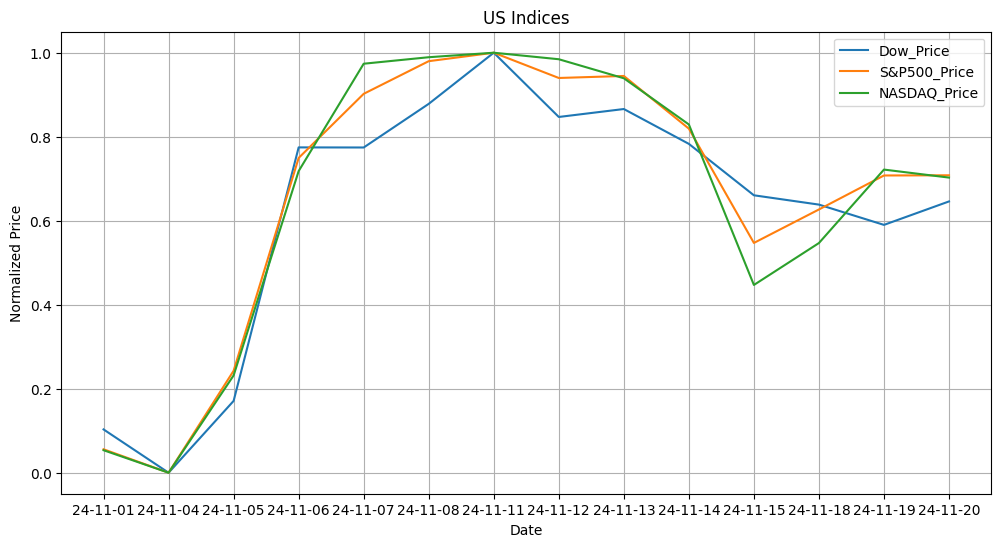

In [ ]:
plot_data(yf_us_indices, base_title="US Indices") # 미국 지수 시각화

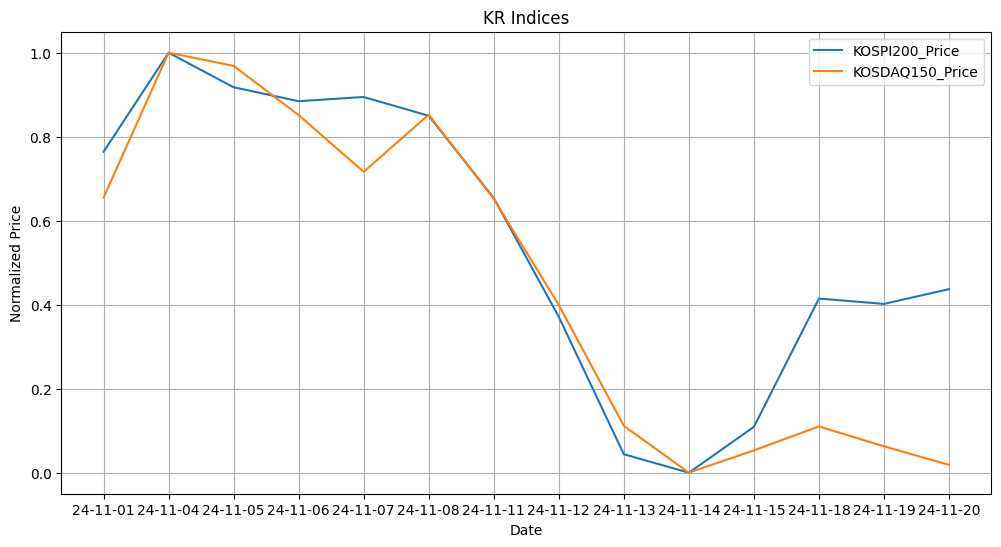

In [ ]:
plot_data(yf_kr_indices, base_title="KR Indices") # 한국 지수 시각화

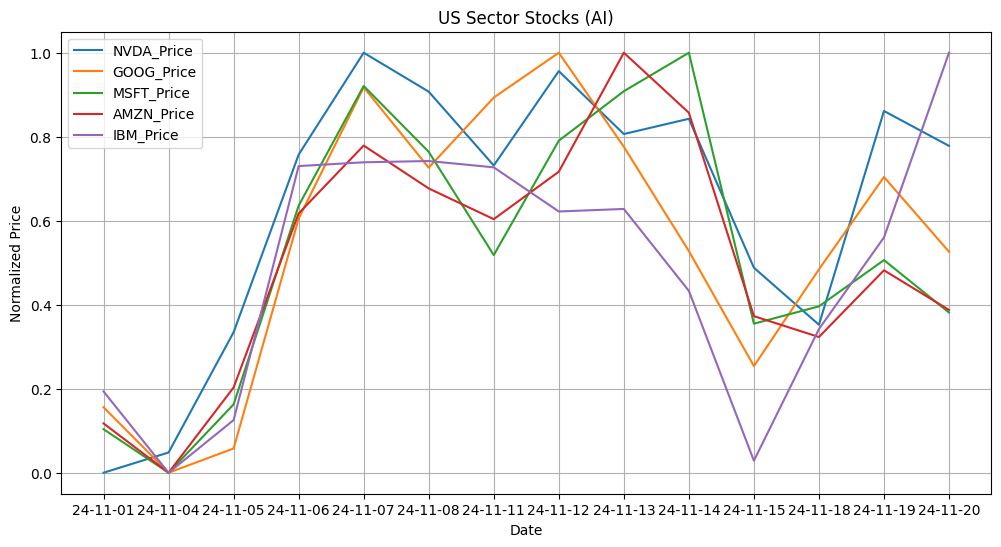

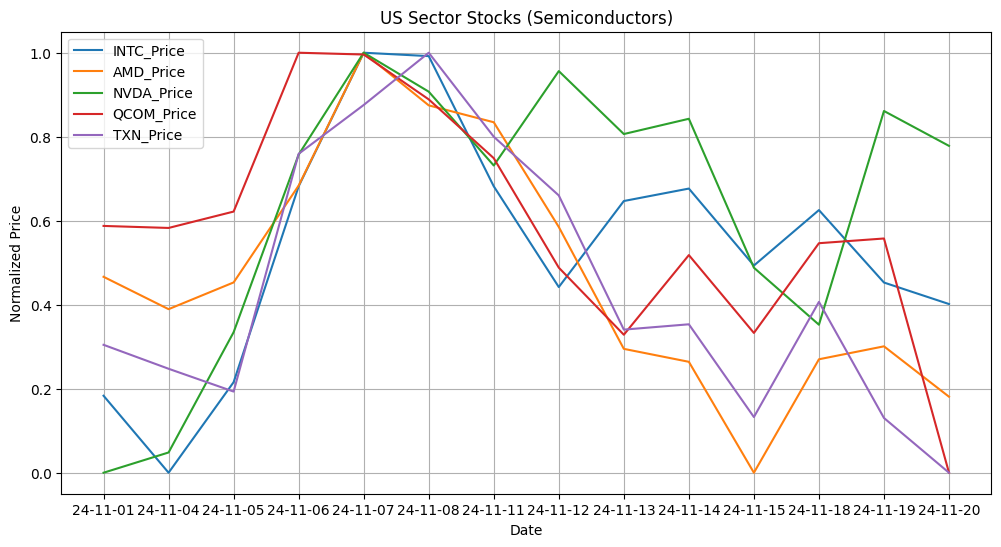

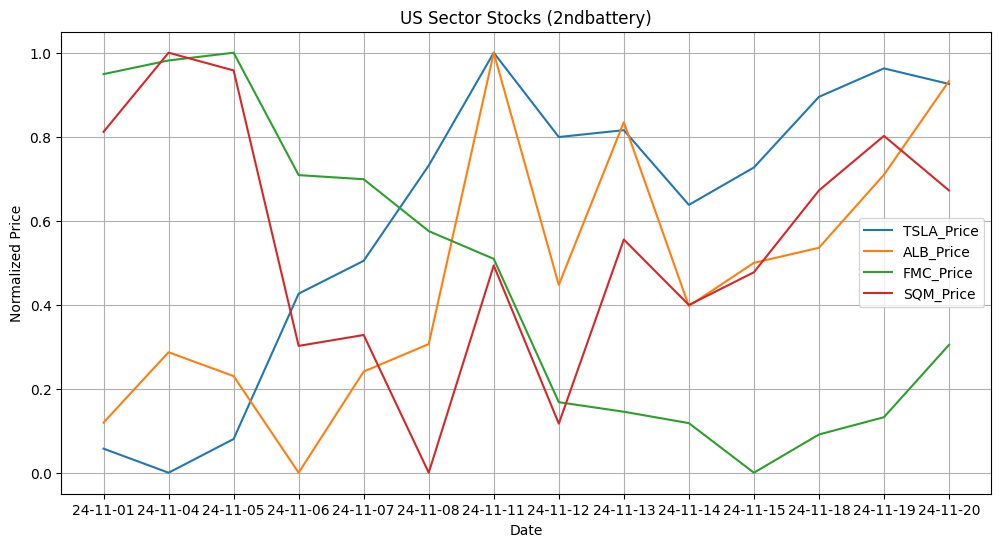

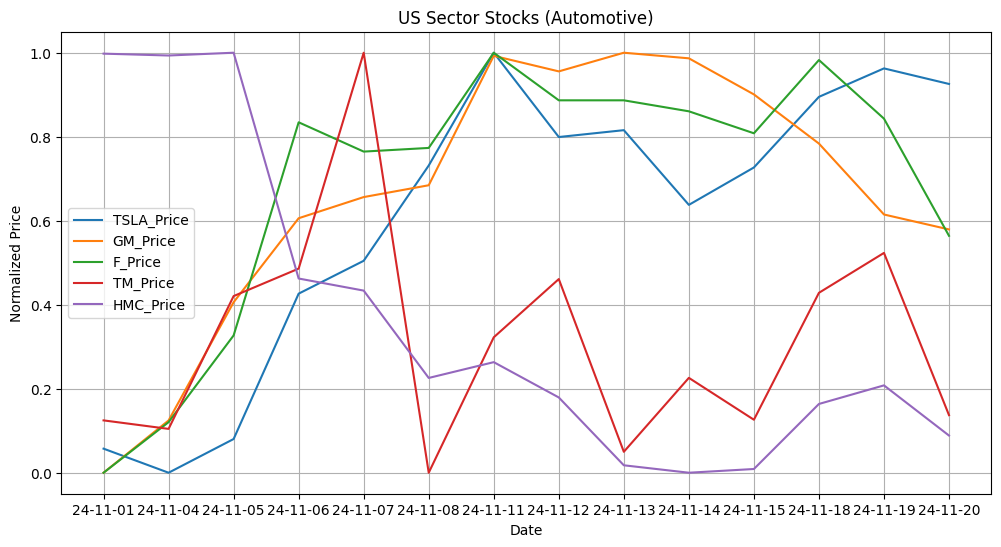

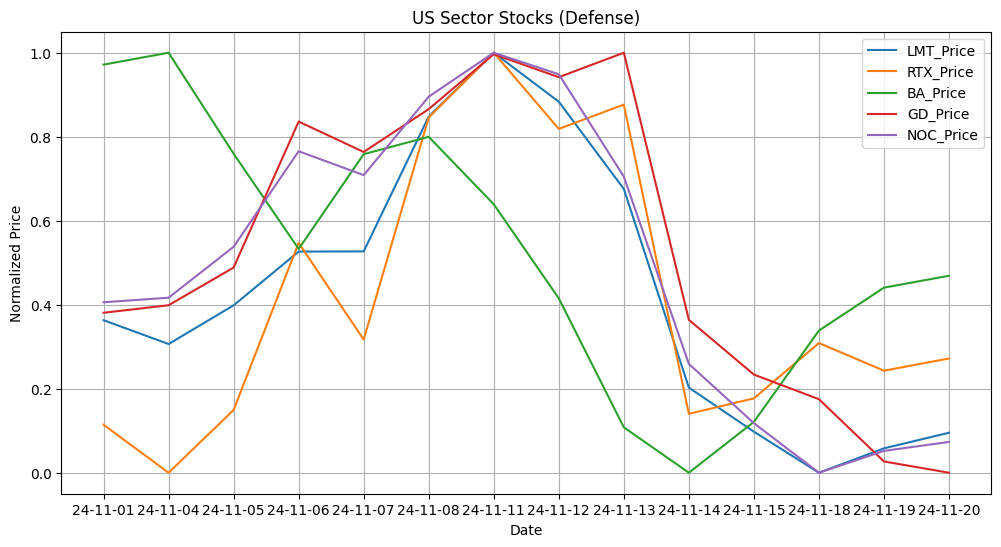

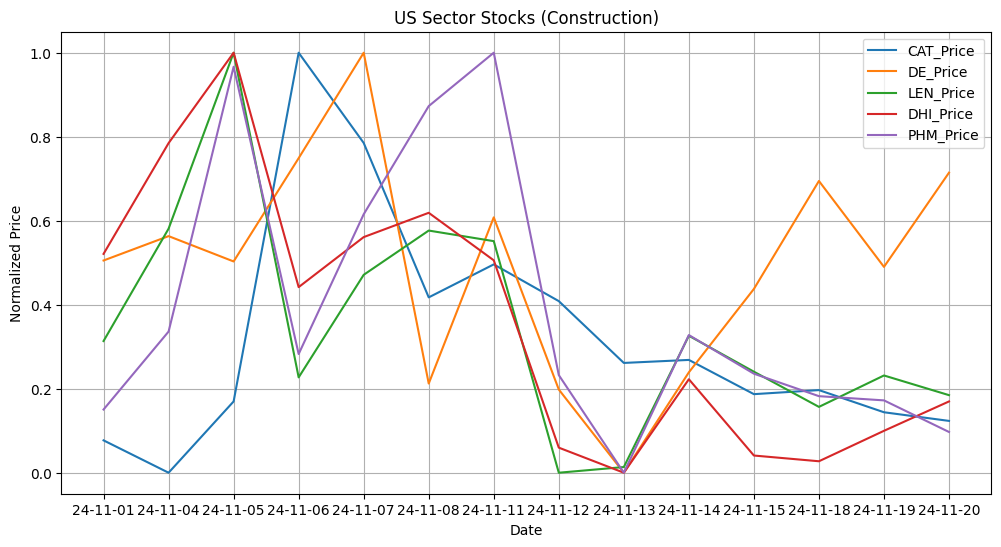

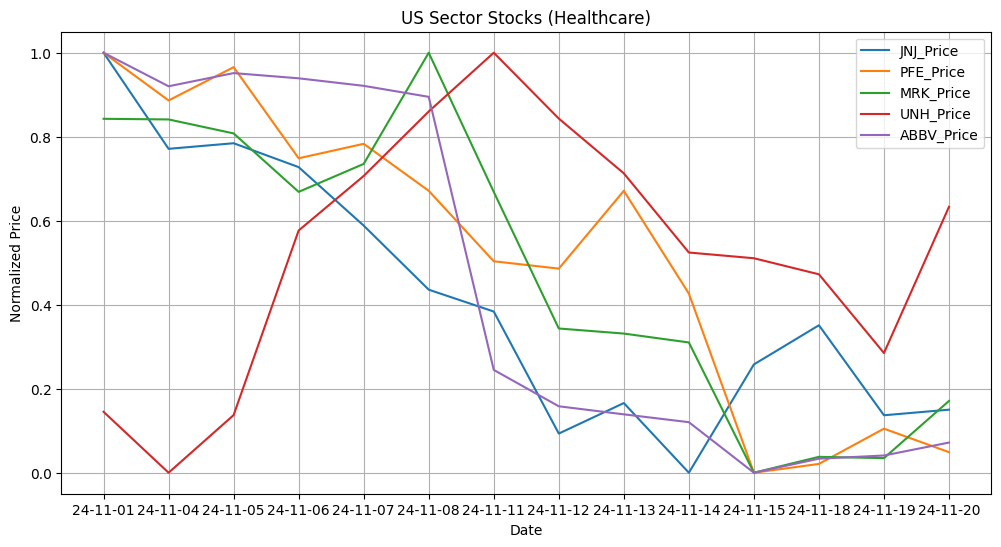

In [ ]:
plot_data(yf_us_sector_stocks, base_title="US Sector Stocks") # 미국 섹터 주식 시각화

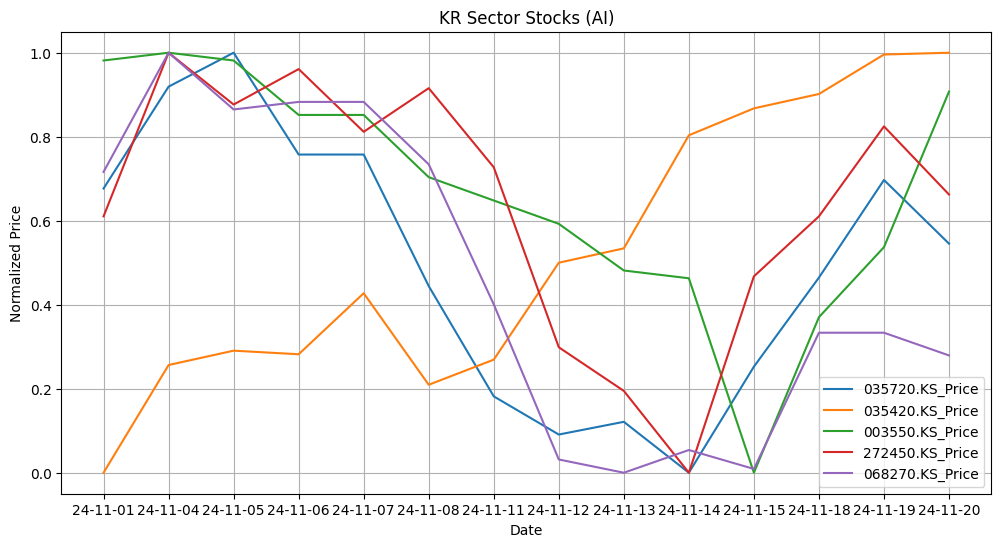

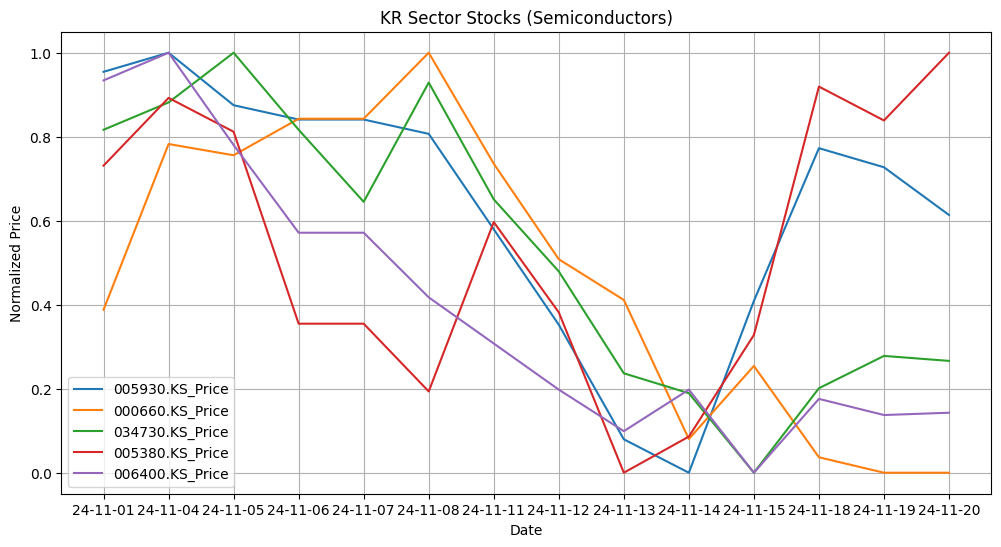

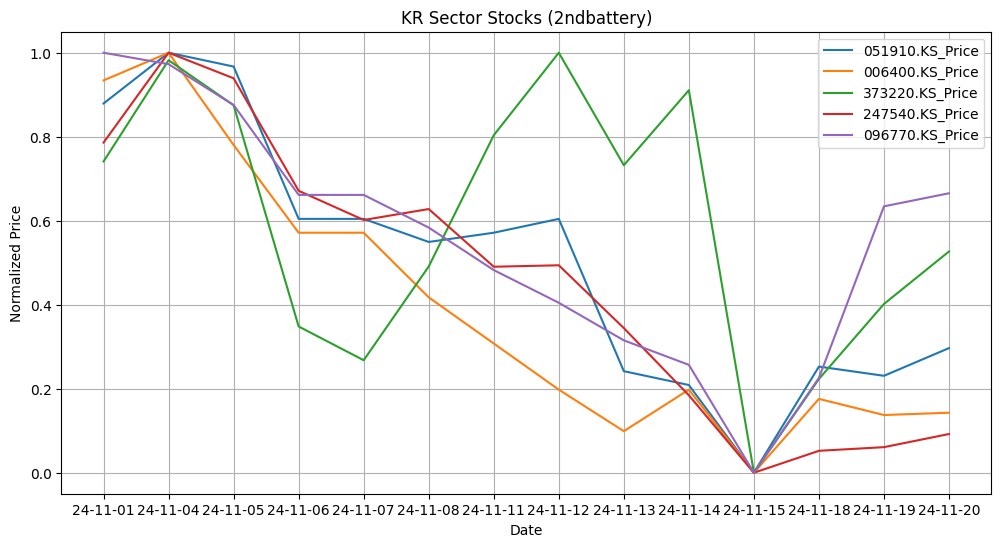

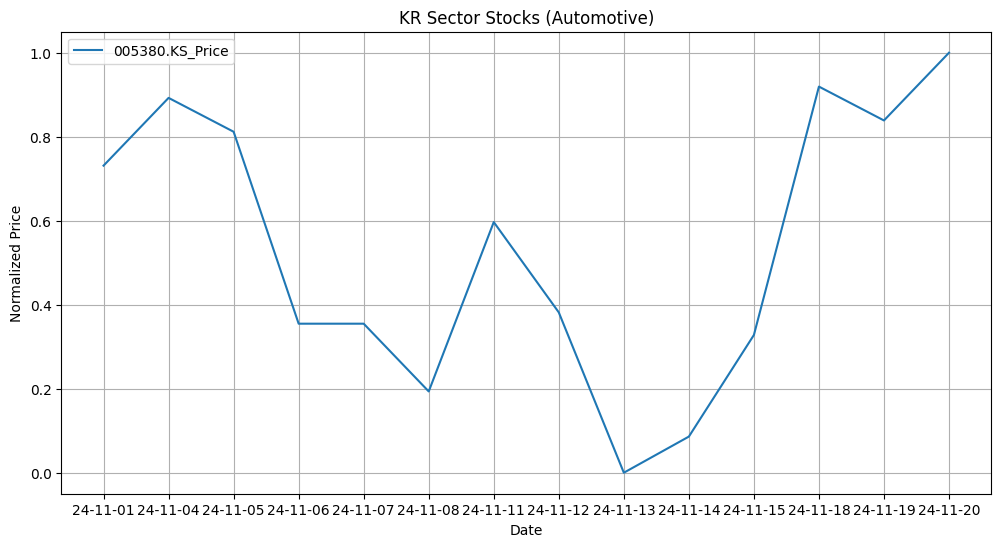

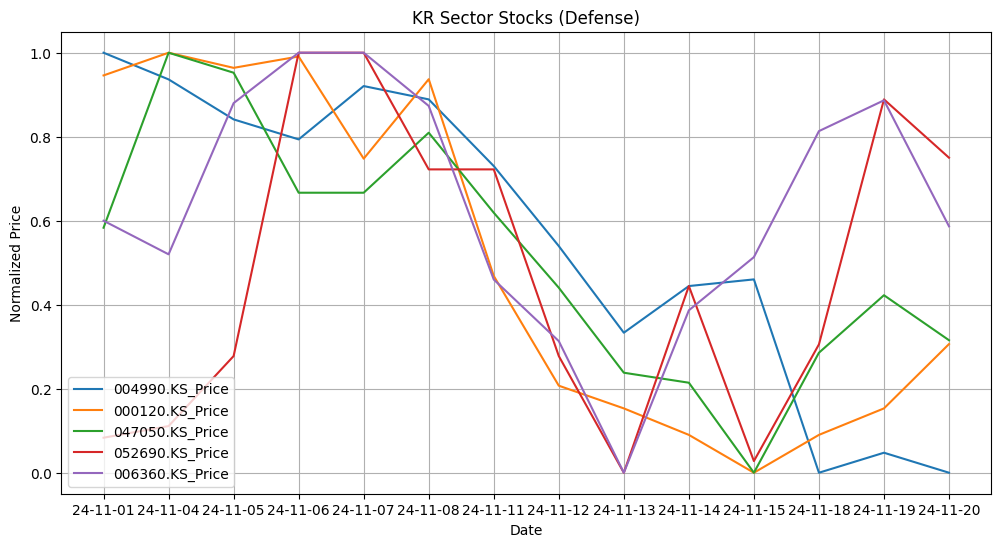

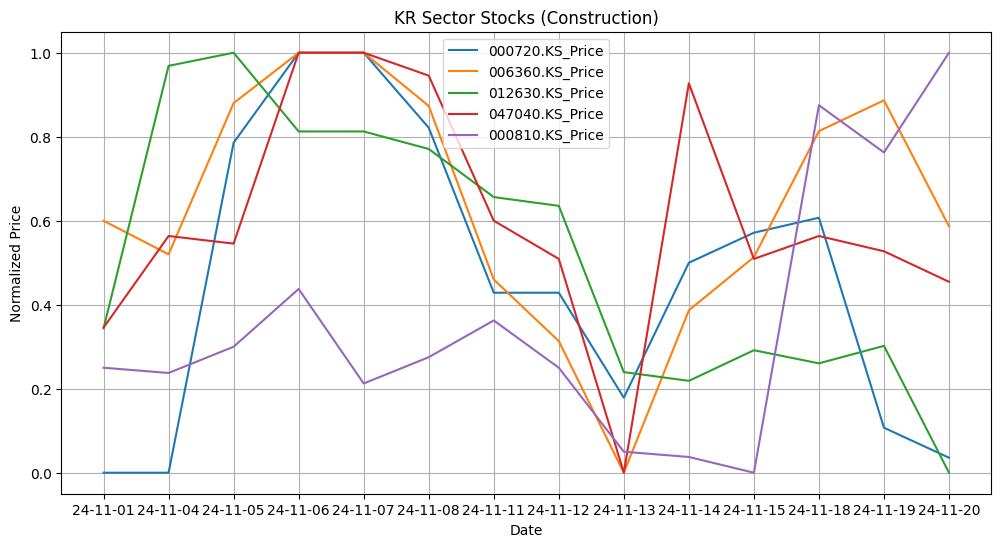

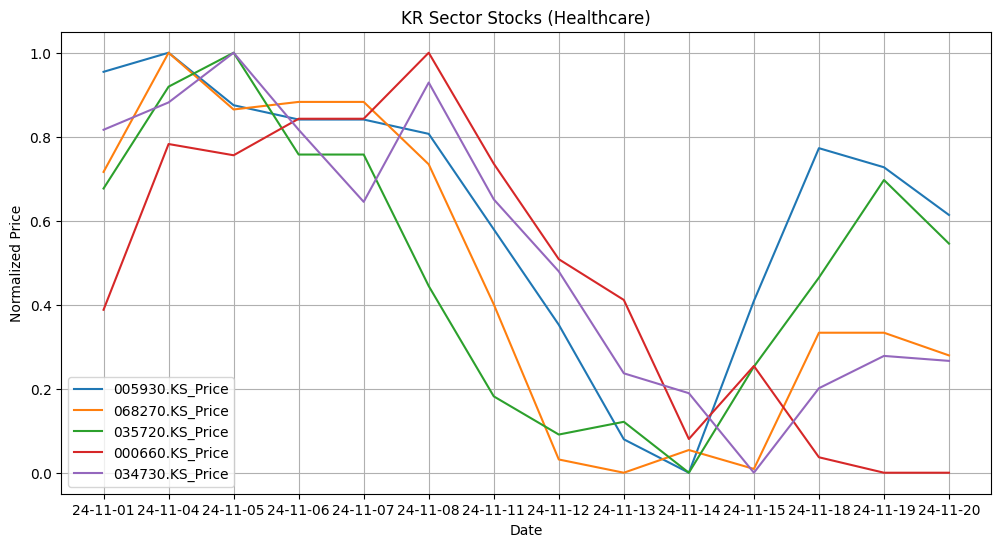

In [ ]:
plot_data(yf_kr_sector_stocks, base_title="KR Sector Stocks") # 한국 섹터 주식 시각화

In [ ]:
# 복잡한 데이터 표현하기
# 한글 출력을 위한 사전작업
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
def normalize_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    데이터프레임을 정규화하여 0과 1 사이로 변환합니다.

    Args:
        df (pd.DataFrame): 정규화할 데이터프레임

    Returns:
        pd.DataFrame: 정규화된 데이터프레임
    """
    return (df - df.min()) / (df.max() - df.min())

def normalize_and_plot(dfs, base_title, industry=None):
    """
    정규화된 데이터프레임 리스트를 선그래프로 시각화합니다.

    Args:
        dfs (list): 데이터프레임 리스트
        base_title (str): 그래프 기본 제목
        industry (str): 섹터 이름 (옵션)
    """
    # 객체지향 API 사용
    fig, ax = plt.subplots(figsize=(12, 6))

    # 스타일 설정
    colors = plt.cm.tab20(np.linspace(0, 1, len(dfs)))

    for df, color in zip(dfs, colors):
        for col in df.columns:
            ax.plot(df.index, df[col], label=col, color=color,
                   linewidth=2, alpha=0.8, marker='o', markersize=4)

    # 그래프 제목 및 레이블 설정
    title = f"{base_title} ({industry})" if industry else base_title
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel("날짜", fontsize=12)
    ax.set_ylabel("정규화된 가격", fontsize=12)

    # 그리드 설정
    ax.grid(True, linestyle='--', alpha=0.7)

    # 테두리 설정
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # x축 날짜 포맷 설정
    ax.tick_params(axis='both', labelsize=10)
    fig.autofmt_xdate()

    # 범례 설정
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
             frameon=False, fontsize=10, title='종목')

    # 여백 조정
    plt.tight_layout()

    plt.show()

def plot_data(df_dict, base_title) -> None:
    """
    데이터프레임 딕셔너리의 모든 데이터를 정규화 후 선그래프로 시각화합니다.

    Args:
        df_dict (dict): 단일 또는 중첩 구조의 데이터프레임 딕셔너리
            - 지수 데이터: {index_name: DataFrame}
            - 섹터 데이터: {sector_name: {company_name: DataFrame}}
        base_title (str): 그래프 기본 제목
    """
    flag = None
    INDICE = 0x01
    SECTOR = 0x02
    result_dfs = []

    # 데이터 가공 및 시각화
    for key1, value1 in df_dict.items():
        if isinstance(value1, dict):  # 섹터 데이터
            result_dfs2 = []
            for key2, value2 in value1.items():
                desc_df = refine_data(value2)  # 데이터 정제
                desc_df.columns = [f"{key2}_{col}" for col in desc_df.columns]
                result_dfs2.append(desc_df)

            result_dfs.append(result_dfs2)
            flag = SECTOR
        else:  # 지수 데이터
            desc_df = refine_data(value1)  # 데이터 정제
            desc_df.columns = [f"{key1}_{col}" for col in desc_df.columns]
            result_dfs.append(desc_df)
            flag = INDICE

    if flag & INDICE:
        result_dfs = [normalize_data(df) for df in result_dfs]
        normalize_and_plot(result_dfs, base_title)

    if flag & SECTOR:
        for i, result_dfs2 in enumerate(result_dfs):
            result_dfs2 = [normalize_data(df) for df in result_dfs2]
            normalize_and_plot(result_dfs2, base_title, list(df_dict.keys())[i])

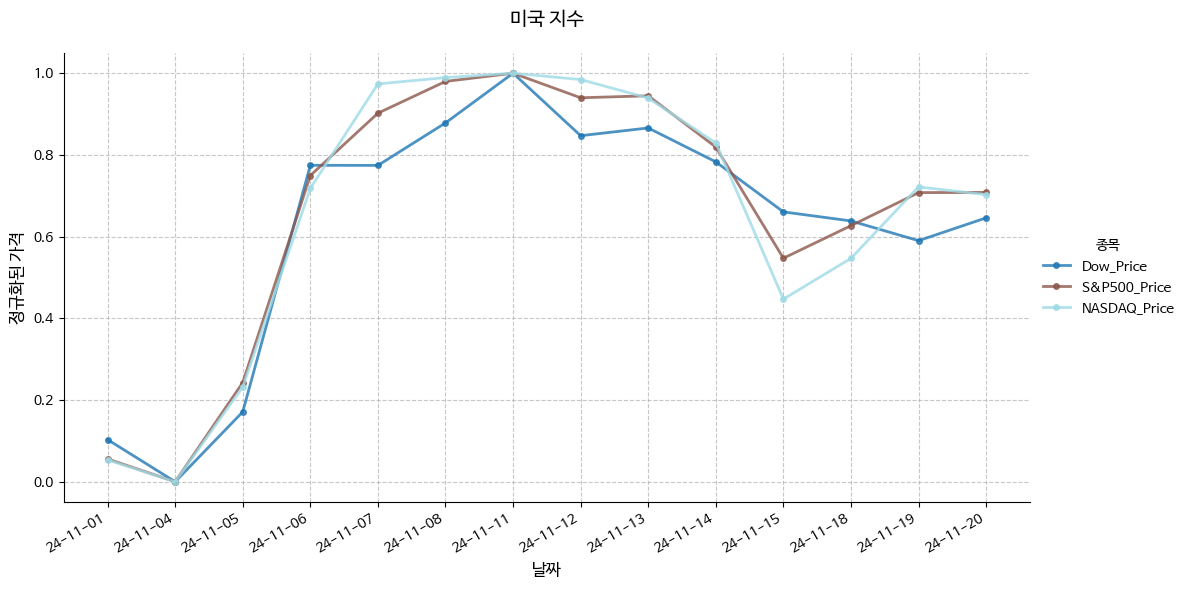

In [ ]:
plot_data(yf_us_indices, base_title="미국 지수") # 미국 지수 시각화